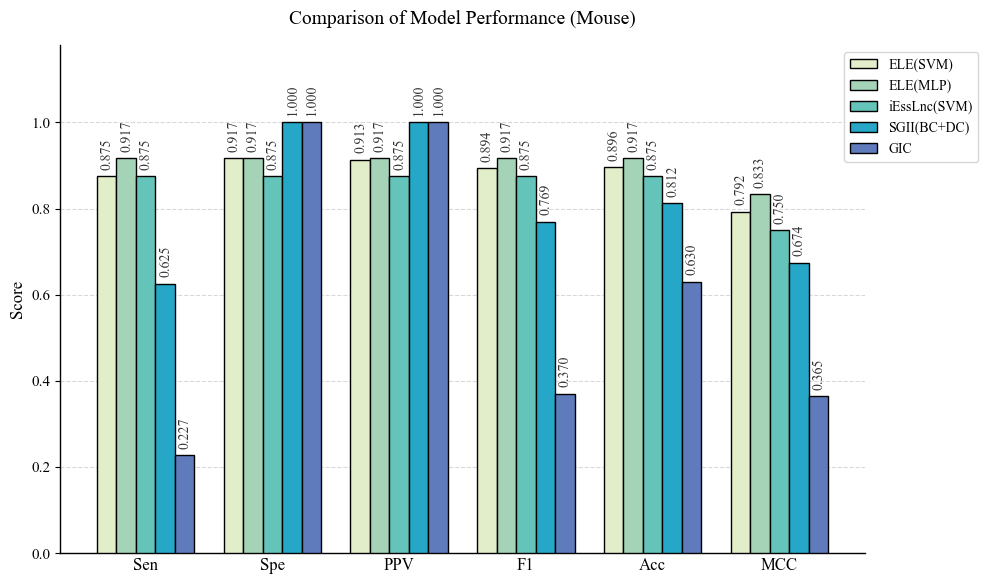

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === 1. Font Configuration ===
config = {
    "font.family": 'serif',
    "font.serif": ['Times New Roman'],
    "mathtext.fontset": 'stix',
    "font.size": 12
}
rcParams.update(config)

# === 2. Load Data (Same as before) ===

df = pd.read_csv('mouse_compare_metrics.csv')
df.set_index('Model', inplace=True)


models = df.index.tolist()
metrics = df.columns.tolist()
num_models = len(models)
num_metrics = len(metrics)

# === 3. Layout Parameter Adjustment (Make it Compact) ===
# Reduced bar width slightly to fit the narrower chart
bar_width = 0.1 
spacing = 0.0 
# Calculate group width more tightly
group_width = num_models * bar_width + 0.15 
x = np.arange(0, num_metrics * group_width, group_width)

# === 4. Color Palette ===
colors = ['#e2edc9', '#a4d3b7', '#65c4b9', '#26a7c8', '#607bbc']

# === 5. Plotting ===
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3, zorder=0)

for i, model in enumerate(models):
    bar_positions = x + i * bar_width
    values = df.loc[model].values

    bars = ax.bar(
        bar_positions, values, width=bar_width,
        color=colors[i % len(colors)], 
        label=model,
        zorder=3,
        edgecolor='black', linewidth=1
    )

    for bar in bars:
        height = bar.get_height()
        if height > 0.05: 
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 0.015,
                f'{height:.3f}',
                ha='center', va='bottom',
                fontsize=10,       
                fontweight='normal', 
                rotation=90,      
                color='#333333', 
            )

# === 6. Chart Beautification ===
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Title and Labels
ax.set_title('Comparison of Model Performance (Mouse)', fontsize=14, pad=15) 
ax.set_ylabel('Score', fontsize=12)

# Axis adjustments
ax.set_ylim(0, 1.18) 
ax.set_yticks(np.arange(0, 1.1, 0.2)) 
ax.tick_params(axis='y', labelsize=11)

# Center X-ticks
ax.set_xticks(x + ((num_models - 1) / 2) * bar_width)
ax.set_xticklabels(metrics, fontsize=12)
ax.tick_params(axis='x', length=0) 

# Legend settings
# Adjusted legend to fit the narrower layout
ax.legend(
    loc='upper right', 
    ncol=1, 
    fontsize=10, 
    frameon=True, 
    bbox_to_anchor=(1.15, 1) # Moved slightly closer to the plot
)

plt.tight_layout()
plt.savefig("mouse/mouse_compare_compact.svg")
plt.show()

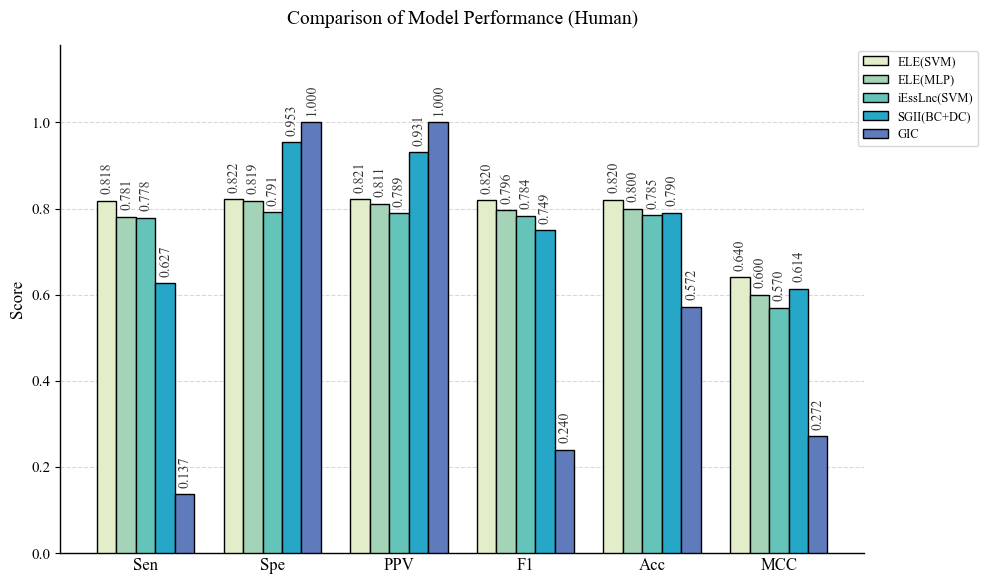

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === 1. Font Configuration ===
config = {
    "font.family": 'serif',
    "font.serif": ['Times New Roman'],
    "mathtext.fontset": 'stix',
    "font.size": 12
}
rcParams.update(config)

# === 2. Load Data (Same as before) ===

df = pd.read_csv('human_compare_metrics.csv')
df.set_index('Model', inplace=True)


models = df.index.tolist()
metrics = df.columns.tolist()
num_models = len(models)
num_metrics = len(metrics)

# === 3. Layout Parameter Adjustment (Make it Compact) ===
# Reduced bar width slightly to fit the narrower chart
bar_width = 0.1 
spacing = 0.0 
# Calculate group width more tightly
group_width = num_models * bar_width + 0.15 
x = np.arange(0, num_metrics * group_width, group_width)

# === 4. Color Palette ===
colors = ['#e2edc9', '#a4d3b7', '#65c4b9', '#26a7c8', '#607bbc']

# === 5. Plotting ===
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3, zorder=0)

for i, model in enumerate(models):
    bar_positions = x + i * bar_width
    values = df.loc[model].values

    bars = ax.bar(
        bar_positions, values, width=bar_width,
        color=colors[i % len(colors)], 
        label=model,
        zorder=3,
        edgecolor='black', linewidth=1 
    )

    for bar in bars:
        height = bar.get_height()
        if height > 0.05: 
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 0.015,
                f'{height:.3f}',
                ha='center', va='bottom',
                fontsize=10,       
                fontweight='normal', 
                rotation=90,      
                color='#333333', 
            )

# === 6. Chart Beautification ===
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Title and Labels
ax.set_title('Comparison of Model Performance (Human)', fontsize=14, pad=15) 
ax.set_ylabel('Score', fontsize=12)

# Axis adjustments
ax.set_ylim(0, 1.18) 
ax.set_yticks(np.arange(0, 1.1, 0.2)) 
ax.tick_params(axis='y', labelsize=11)

# Center X-ticks
ax.set_xticks(x + ((num_models - 1) / 2) * bar_width)
ax.set_xticklabels(metrics, fontsize=12)
ax.tick_params(axis='x', length=0) 

# Legend settings
# Adjusted legend to fit the narrower layout
ax.legend(
    loc='upper right', 
    ncol=1, 
    fontsize=9, 
    frameon=True, 
    bbox_to_anchor=(1.15, 1) # Moved slightly closer to the plot
)

plt.tight_layout()
plt.savefig("human/human_compare_compact.svg")
plt.show()

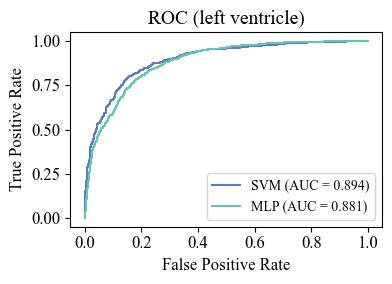

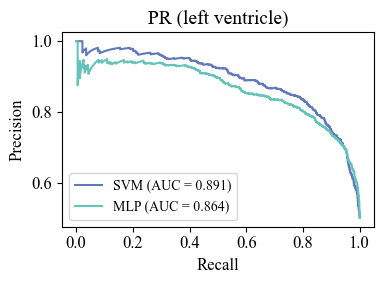

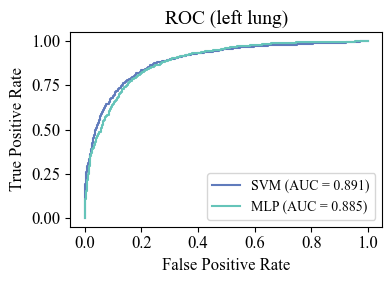

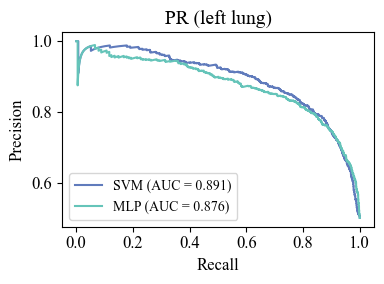

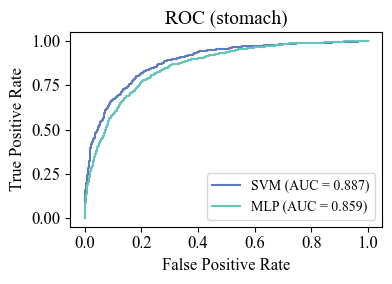

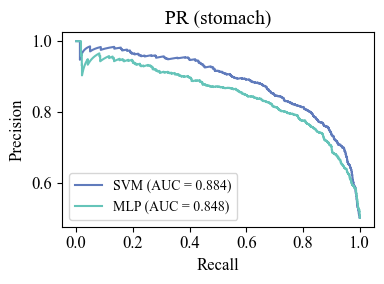

In [4]:
# Human
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Set the directory where your CSV files are located
input_folder = '../../classifier/'

if __name__ == "__main__":

    model_names = ['SVM', 'MLP']
    species = 'human'
    
    # Define a color map for different models
    model_colors = {
        'SVM': '#607BBC', 
        'MLP': '#65c4b9'
    }

    tissues = {
        'heart': 'left ventricle',
        'lung': 'left lung',
        'stomach': 'stomach'
    }

    for tissue, tissue_name in tissues.items():
        
        # Plot ROC AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            roc_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/roc_curve_{tissue}.csv')
            roc_data = pd.read_csv(roc_file_path)
            fpr = roc_data['FPR']
            tpr = roc_data['TPR']
            roc_auc = auc(fpr, tpr)
            # Use the color from model_colors dictionary
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC ({tissue_name})', fontsize=14)
        plt.legend(loc='lower right', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_ROC.svg')
        plt.show()

        # Plot Precision-Recall AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            pr_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/pr_curve_{tissue}.csv')
            pr_data = pd.read_csv(pr_file_path)
            recall = pr_data['Recall']
            precision = pr_data['Precision']
            pr_auc = auc(recall, precision)
            # Use the color from model_colors dictionary
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'PR ({tissue_name})', fontsize=14)
        plt.legend(loc='lower left', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_PR.svg')
        plt.show()


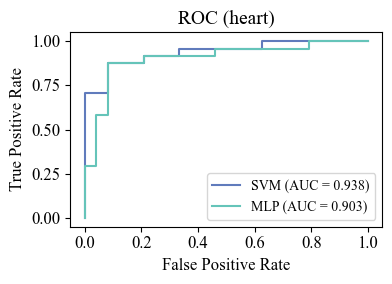

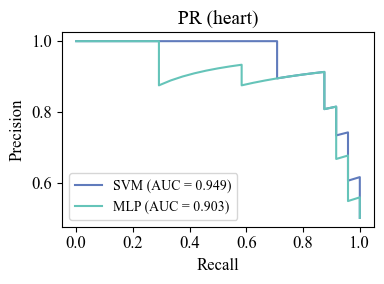

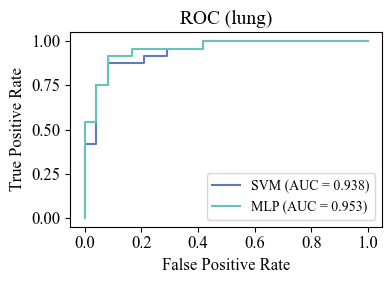

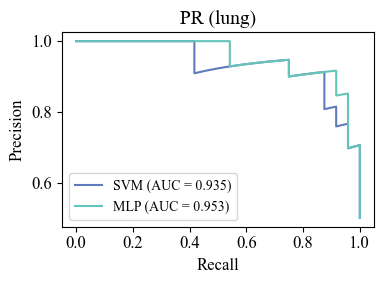

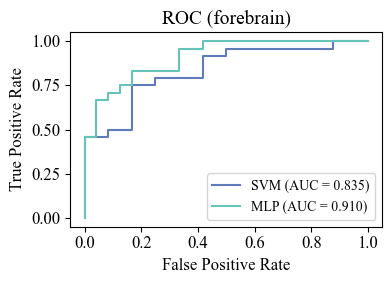

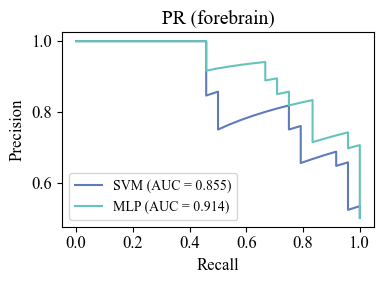

In [5]:
# Mouse
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os
from matplotlib import rcParams

# Set the font style
rcParams['font.family'] = 'Times New Roman'

# Set the directory where your CSV files are located
input_folder = '../../classifier/'

if __name__ == "__main__":

    model_names = ['SVM', 'MLP']
    species = 'mouse'
    
    # Define a color map for different models
    model_colors = {
        'SVM': '#607BBC', 
        'MLP': '#65c4b9'
    }

    tissues = {
        'heart': 'heart',
        'lung': 'lung',
        'brain': 'forebrain'
    }

    for tissue, tissue_name in tissues.items():
        
        # Plot ROC AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            roc_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/roc_curve_{tissue}.csv')
            roc_data = pd.read_csv(roc_file_path)
            fpr = roc_data['FPR']
            tpr = roc_data['TPR']
            roc_auc = auc(fpr, tpr)
            # Use the color from model_colors dictionary
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC ({tissue_name})', fontsize=14)
        plt.legend(loc='lower right', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_ROC.svg')
        plt.show()

        # Plot Precision-Recall AUC comparison curve
        plt.figure(figsize=(4,3))
        for model_name in model_names:
            pr_file_path = os.path.join(input_folder, f'{model_name}/performance/{species}/curve/pr_curve_{tissue}.csv')
            pr_data = pd.read_csv(pr_file_path)
            recall = pr_data['Recall']
            precision = pr_data['Precision']
            pr_auc = auc(recall, precision)
            # Use the color from model_colors dictionary
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', color=model_colors.get(model_name))

        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'PR ({tissue_name})', fontsize=14)
        plt.legend(loc='lower left', frameon=True, fontsize=10)
        plt.tight_layout()
        plt.savefig(f'{species}/{tissue}_PR.svg')
        plt.show()
